In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import pyprojroot.here as here

# Tokenization and cleaning
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

ModuleNotFoundError: No module named 'pyprojroot'

In [2]:
# Load the dataset
data = pd.read_csv(here('data/cleaned/cleaned_mbs_total.csv'))
data.head(3)

,Unnamed: 0,date_of_stay,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating1,rating2,rating,valid_rating,label,cleaned_review,combined_review,date,covid
0,0,Date of stay: August 2023,Erica G,"Sick in Singapore, and MBS staff were amazing!","I was in Singapore on business and, unfortunat...",Trip type: Travelled on business,"Arlington Heights, Illinois",105.0,62.0,5.0,NaN,5.0,True,Positive,sick singapore mbs staff amazing I singapore b...,"Sick in Singapore, and MBS staff were amazing!...",2023-08-01,PostCovid
1,1,Date of stay: April 2023,HJay,Lovely place to go whatever you plan to do!,Whether it’s to soak up the Marina Bay citysca...,NaN,"Perth, Australia",14.0,11.0,NaN,NaN,NaN,False,NaN,lovely place go whatever plan whether soak mar...,Lovely place to go whatever you plan to do! Wh...,2023-04-01,PostCovid
2,2,Date of stay: September 2023,TaM,Thank you for the unforgettable memories,I stayed at Marina Bay Sands to propose to my ...,Trip type: Travelled as a couple,NaN,1.0,NaN,5.0,NaN,5.0,True,Positive,thank unforgettable memory I stay marina bay s...,Thank you for the unforgettable memories I sta...,2023-09-01,PostCovid


In [5]:
data.dtypes

Unnamed: 0                                 int64
date_of_stay                              object
traveller_username                        object
review_title                              object
review_text                               object
travel_type                               object
traveller_country_origin                  object
traveller_total_contributions            float64
traveller_total_helpful_contributions    float64
rating1                                  float64
rating2                                  float64
rating                                   float64
valid_rating                                bool
label                                     object
cleaned_review                            object
combined_review                           object
date                                      object
covid                                     object
dtype: object

In [6]:
# Extract the date from the "date_of_stay" column and convert it to datetime
data['date_of_stay'] = pd.to_datetime(data['date_of_stay'], format='Date of stay: %B %Y')
data.dtypes

Unnamed: 0                                        int64
date_of_stay                             datetime64[ns]
traveller_username                               object
review_title                                     object
review_text                                      object
travel_type                                      object
traveller_country_origin                         object
traveller_total_contributions                   float64
traveller_total_helpful_contributions           float64
rating1                                         float64
rating2                                         float64
rating                                          float64
valid_rating                                       bool
label                                            object
cleaned_review                                   object
combined_review                                  object
date                                             object
covid                                           

In [21]:
# Filter the dataset for dates >= 2015
filtered_data = data[data['date_of_stay'].dt.year > 2014]
filtered_data.date_of_stay.dt.year.value_counts()[filtered_data.date_of_stay.dt.year.unique()]

date_of_stay
2023     162
2022     307
2021     161
2020     327
2019    1339
2018    1813
2017    1922
2016    2272
2015    2220
Name: count, dtype: int64

In [22]:
# Get PreCovid Data
data_precovid = filtered_data[filtered_data['covid'] == 'PreCovid']

# Get Post Covid Data
data_postcovid = filtered_data[filtered_data['covid'] == 'PostCovid']

In [23]:
def preprocess_text(text):
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalnum()]
    tokens = [word.lower() for word in tokens]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [23]:
#Preprocessing 
data_precovid['tokens'] = data_precovid['cleaned_review'].apply(preprocess_text)

# Create a dictionary and a corpus
pre_dictionary = corpora.Dictionary(data_precovid['tokens'])
pre_corpus = [pre_dictionary.doc2bow(text) for text in data_precovid['tokens']]

# LDA model
num_topics = 5  # Adjust the number of topics as needed
pre_lda_model = models.LdaModel(pre_corpus, num_topics=num_topics, id2word=pre_dictionary, passes=15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(pre_lda_model, pre_corpus, pre_dictionary)
pyLDAvis.display(vis)

/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/2252244926.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_precovid['tokens'] = data_precovid['cleaned_review'].apply(preprocess_text)


In [24]:
#Preprocessing 
data_postcovid['tokens'] = data_postcovid['cleaned_review'].apply(preprocess_text)

# Create a dictionary and a corpus
post_dictionary = corpora.Dictionary(data_postcovid['tokens'])
post_corpus = [post_dictionary.doc2bow(text) for text in data_postcovid['tokens']]

# LDA model
num_topics = 5  # Adjust the number of topics as needed
post_lda_model = models.LdaModel(post_corpus, num_topics=num_topics, id2word=post_dictionary, passes=15)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(post_lda_model, post_corpus, post_dictionary)
pyLDAvis.display(vis)


/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/335232536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_postcovid['tokens'] = data_postcovid['cleaned_review'].apply(preprocess_text)


In [46]:
# Create the LDA model
num_topics = 5
pre_lda_model = models.LdaModel(pre_corpus, num_topics=num_topics, id2word=pre_dictionary, passes=15)

# Show topics with different relevance values
# For example, set topn=10 to display the top 10 terms per topic
topics_with_high_relevance = pre_lda_model.show_topics(num_topics=num_topics, num_words=10)
topics_with_low_relevance = pre_lda_model.show_topics(num_topics=num_topics, num_words=5)  # Lower relevance

# Print and examine the topics
print("Topics with high relevance:")
for topic_id, topic in topics_with_high_relevance:
    print(f"Topic {topic_id}: {topic}")

print("\nTopics with low relevance:")
for topic_id, topic in topics_with_low_relevance:
    print(f"Topic {topic_id}: {topic}")

Topics with high relevance:
Topic 0: 0.044*"room" + 0.022*"check" + 0.022*"pool" + 0.015*"view" + 0.013*"club" + 0.013*"get" + 0.012*"floor" + 0.010*"stay" + 0.010*"night" + 0.008*"breakfast"
Topic 1: 0.042*"hotel" + 0.033*"pool" + 0.026*"view" + 0.018*"stay" + 0.016*"room" + 0.016*"singapore" + 0.015*"good" + 0.013*"great" + 0.013*"bay" + 0.011*"amazing"
Topic 2: 0.028*"hotel" + 0.017*"room" + 0.013*"check" + 0.011*"service" + 0.010*"get" + 0.009*"stay" + 0.008*"like" + 0.008*"staff" + 0.008*"pool" + 0.008*"guest"
Topic 3: 0.033*"stay" + 0.027*"room" + 0.023*"hotel" + 0.021*"view" + 0.019*"staff" + 0.018*"bay" + 0.017*"amazing" + 0.015*"pool" + 0.014*"service" + 0.014*"marina"
Topic 4: 0.029*"u" + 0.013*"n" + 0.010*"food" + 0.009*"restaurant" + 0.008*"lunch" + 0.007*"dinner" + 0.006*"buffet" + 0.006*"indian" + 0.006*"serve" + 0.005*"cheese"

Topics with low relevance:
Topic 0: 0.044*"room" + 0.022*"check" + 0.022*"pool" + 0.015*"view" + 0.013*"club"
Topic 1: 0.042*"hotel" + 0.033*"poo

Here's what each value on the relevance metric slider means:

λ = 0.0: When λ is set to 0.0, the terms displayed for each topic are solely based on their frequency within that topic. This means that the most frequent terms in each topic will be shown.

λ = 0.2: As you increase λ, the relevance metric starts to consider both the frequency of terms within a topic and their exclusivity to that topic. Terms that are relatively unique to a topic are given more weight.

λ = 0.4: At λ = 0.4, the balance between term frequency and exclusivity is further adjusted. Terms that are both frequent within a topic and relatively unique to that topic are more likely to be displayed.

λ = 0.6: A higher λ value, such as 0.6, places even more emphasis on the exclusivity of terms to each topic. Terms that are unique to a specific topic will be prioritized over those that are frequent but not exclusive.

λ = 0.8: With λ set to 0.8, the visualization will focus on displaying terms that are highly exclusive to each topic. Common terms that appear in multiple topics will be less emphasized.

λ = 1.0: At λ = 1.0, only the most exclusive terms for each topic will be shown. The visualization will prioritize terms that are unique to each topic and ignore common terms.

In [26]:
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

In [26]:
# For Pre-COVID
topics_pre = pre_lda_model.show_topics(formatted=False)
data_flat_pre = [word for word_list in data_precovid['tokens'] for word in word_list]

# For Post-COVID
topics_post = post_lda_model.show_topics(formatted=False)
data_flat_post = [word for word_list in data_postcovid['tokens'] for word in word_list]

/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn

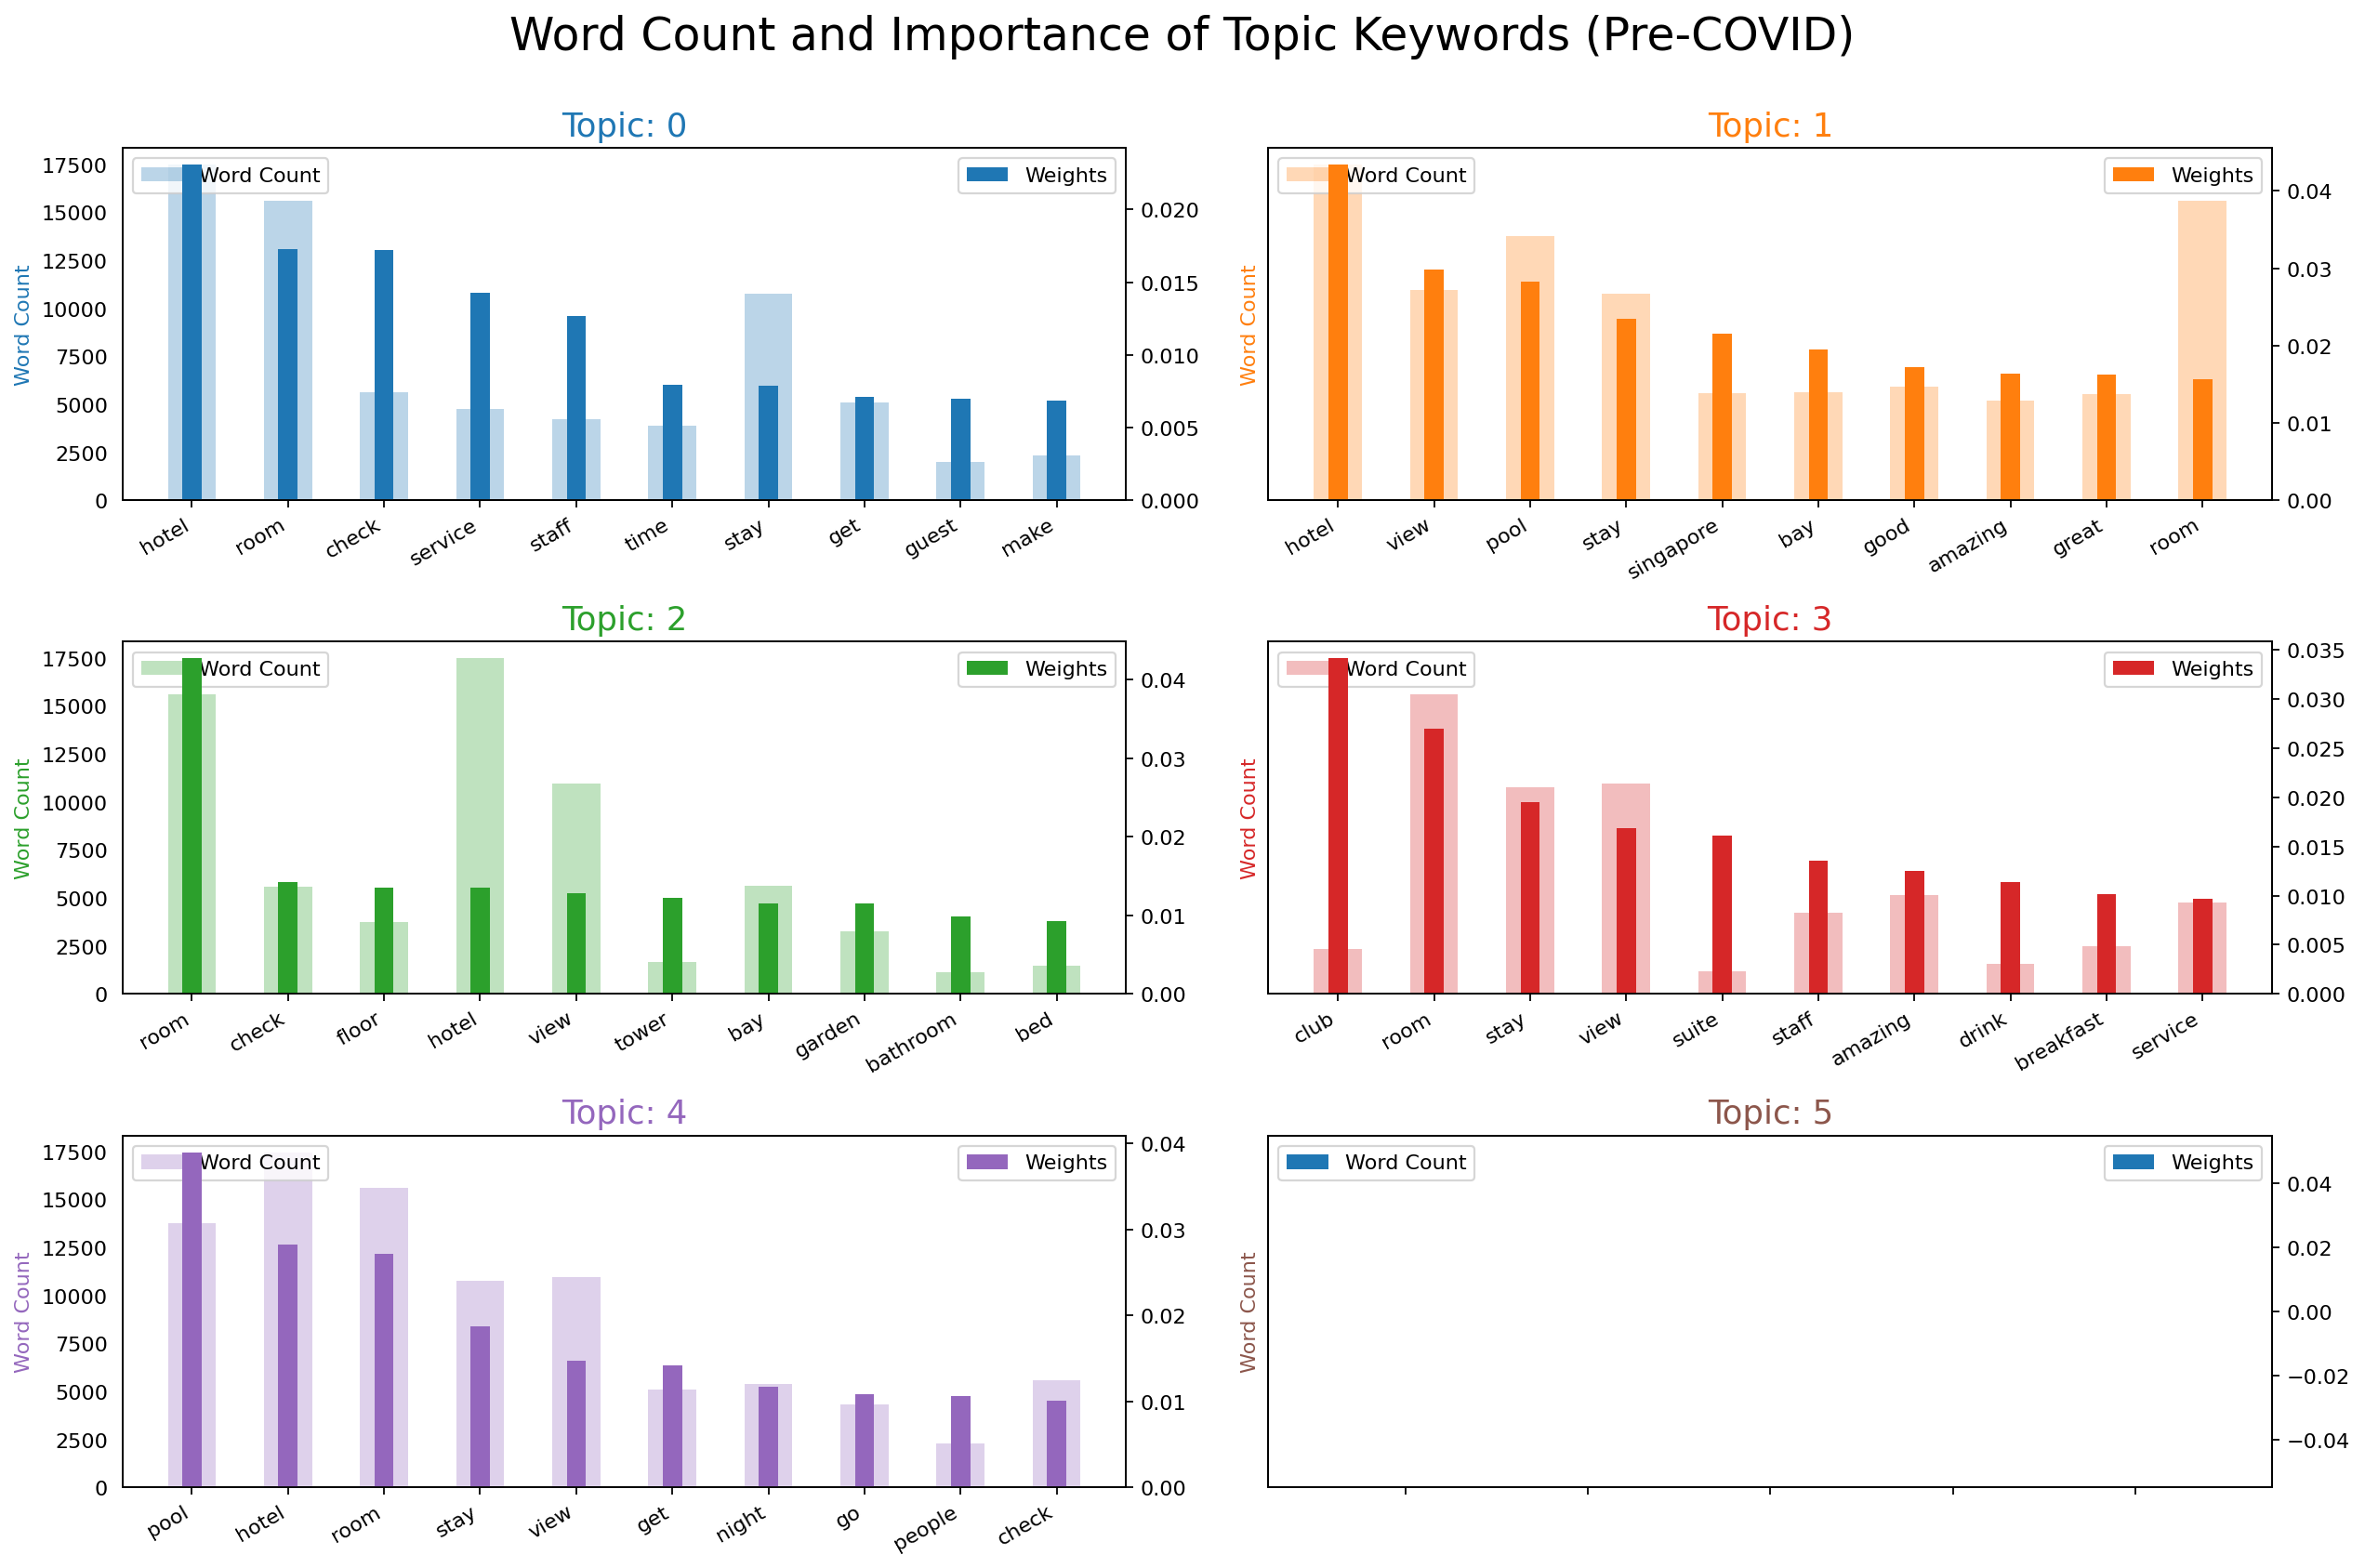

/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn/T/ipykernel_21853/1266816141.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
/var/folders/ky/dld3nt697vd3mj4mkgcflx9m0000gn

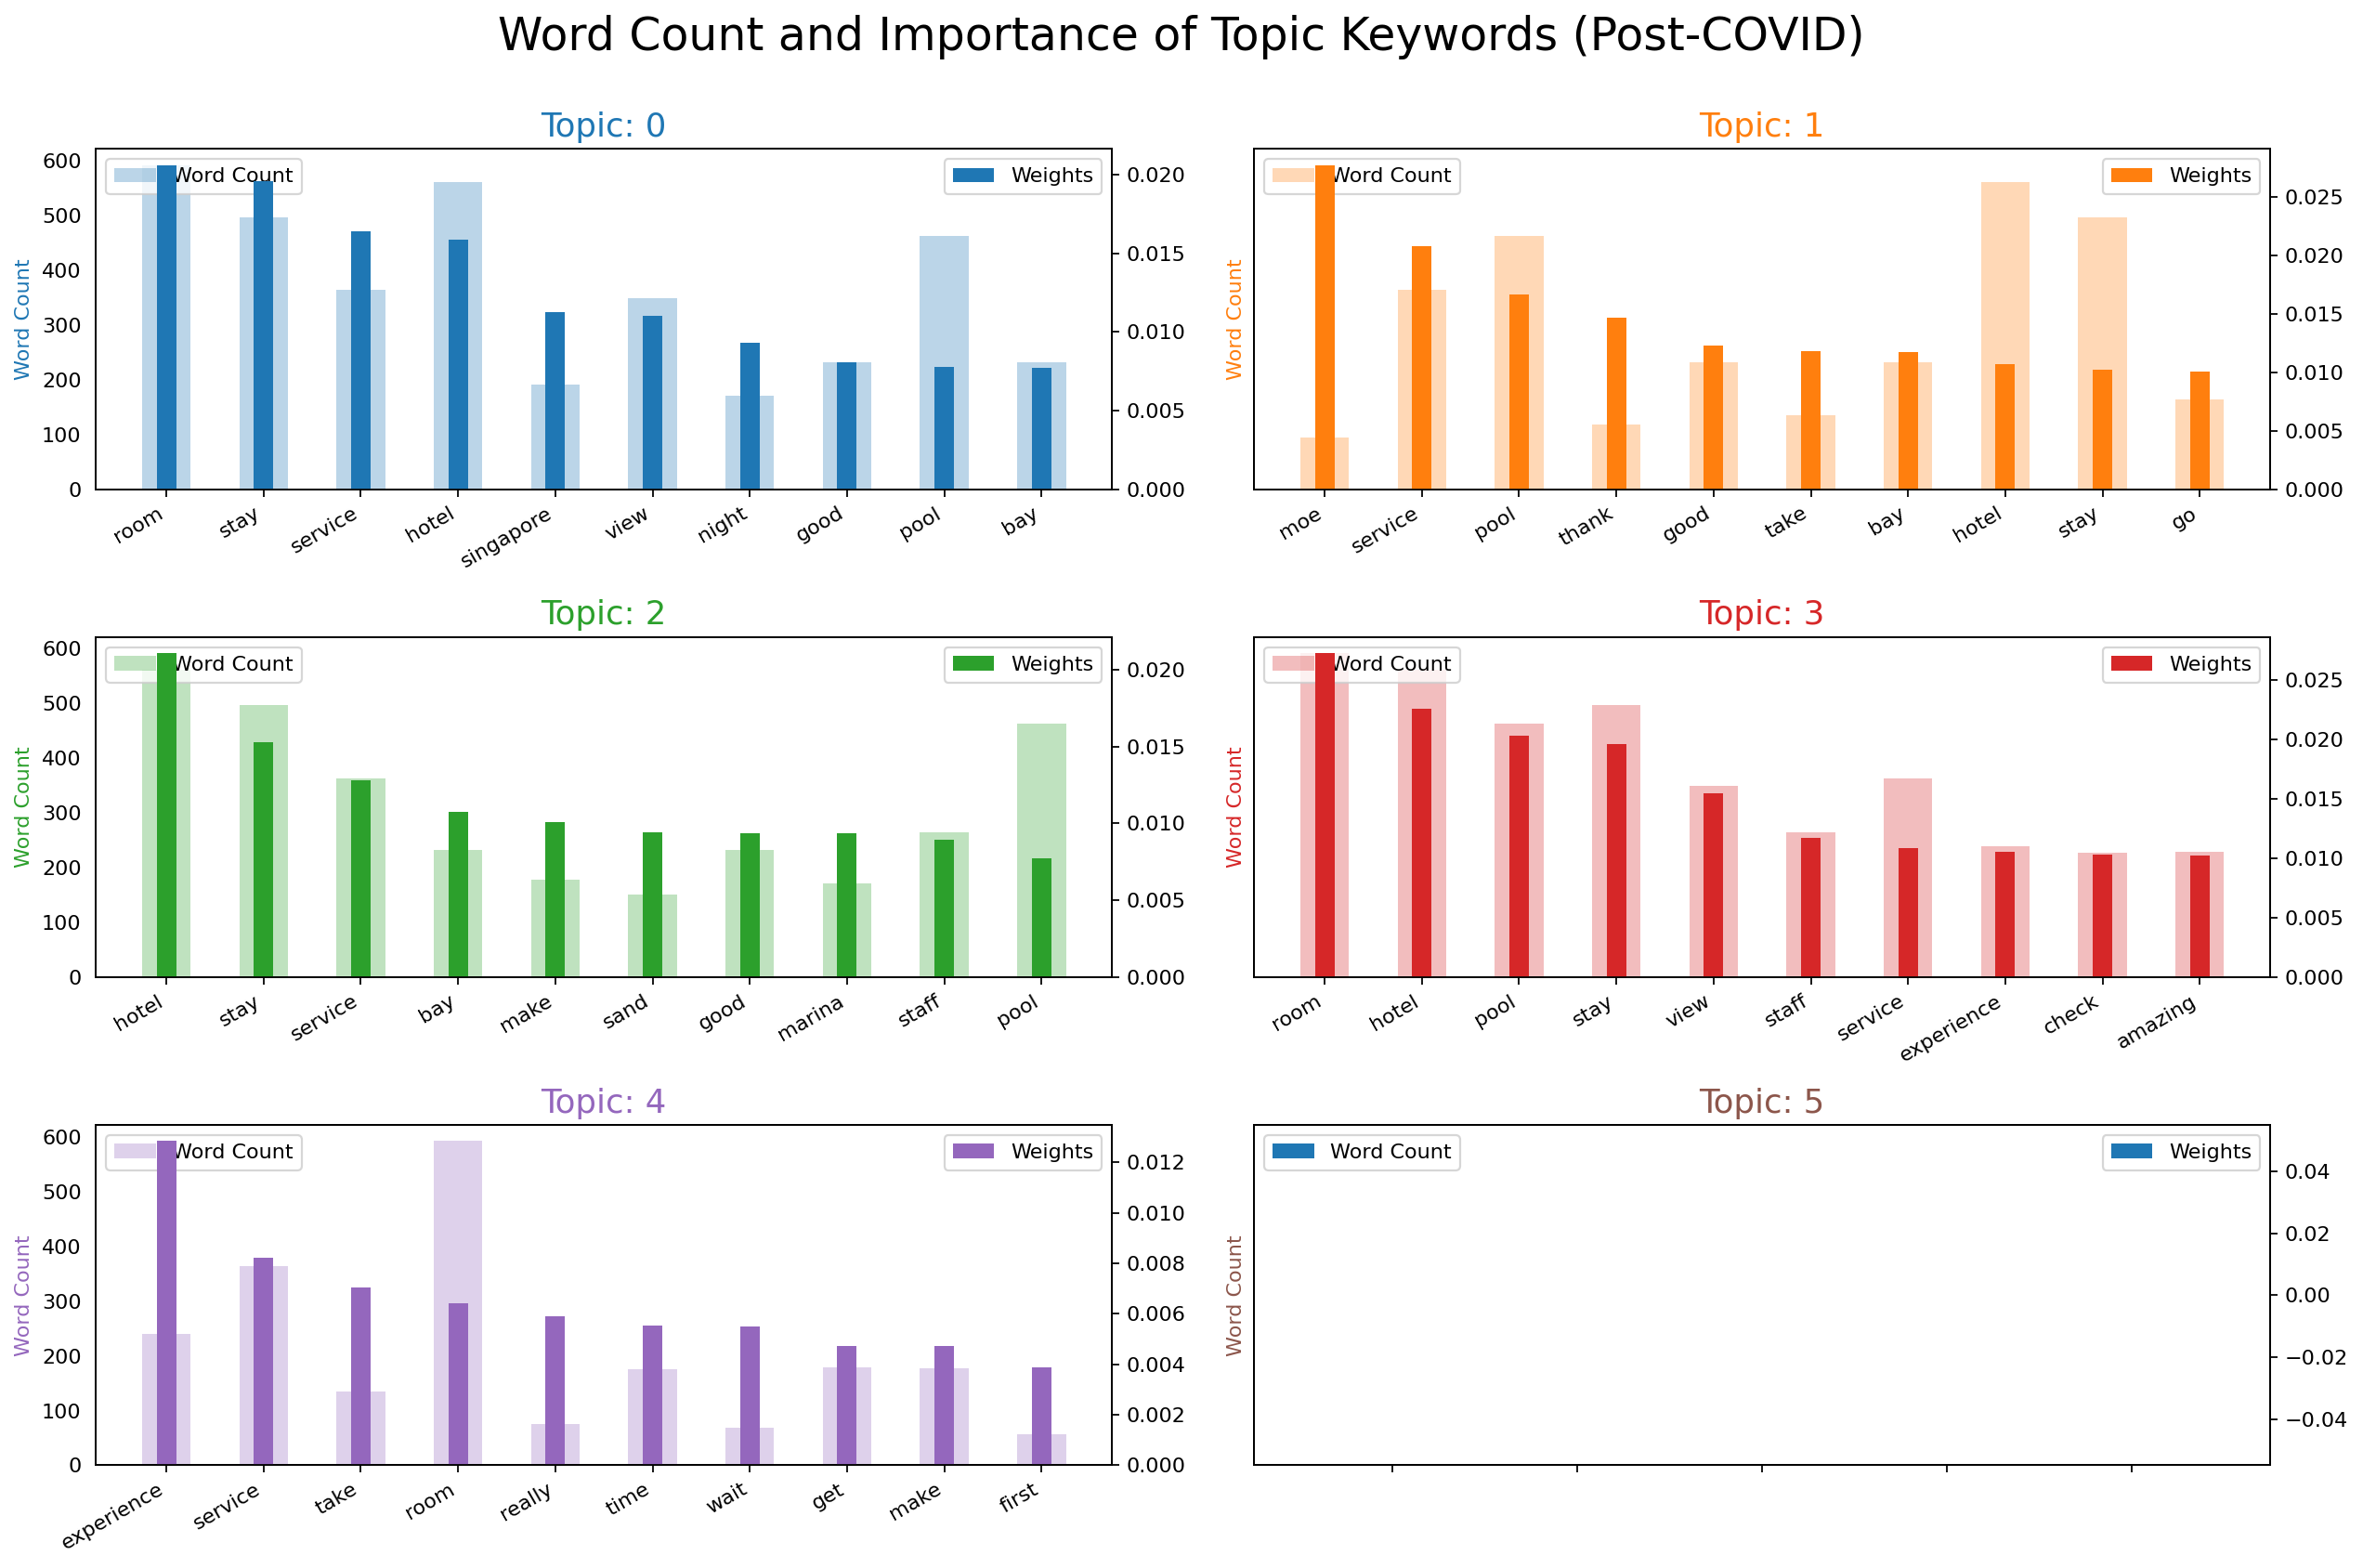

In [25]:
# Create a function to generate the plot
def plot_word_count_importance(topics, data_flat, title):
    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i, weight, data_flat.count(word)])

    df_plot = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(3, 2, figsize=(16, 10), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height='word_count', data=df_plot.loc[df_plot.topic_id == i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height='importance', data=df_plot.loc[df_plot.topic_id == i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df_plot.loc[df_plot.topic_id == i, 'word'], rotation=30, horizontalalignment='right')
        ax.legend(loc='upper left')
        ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)
    fig.suptitle(title, fontsize=22, y=1.05)
    plt.show()

# For Pre-COVID
plot_word_count_importance(topics_pre, data_flat_pre, 'Word Count and Importance of Topic Keywords (Pre-COVID)')

# For Post-COVID
plot_word_count_importance(topics_post, data_flat_post, 'Word Count and Importance of Topic Keywords (Post-COVID)')

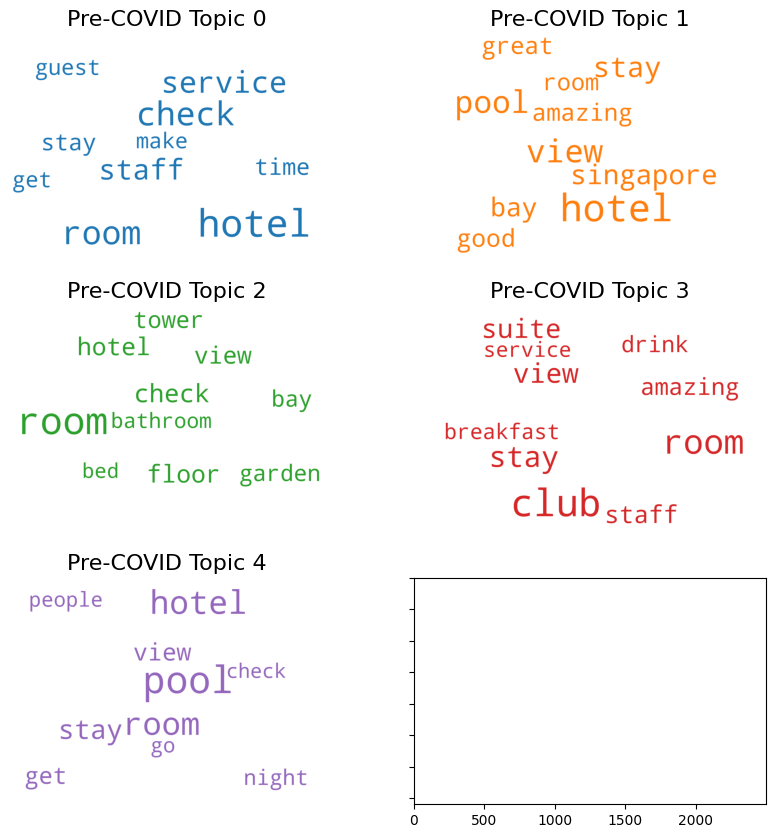

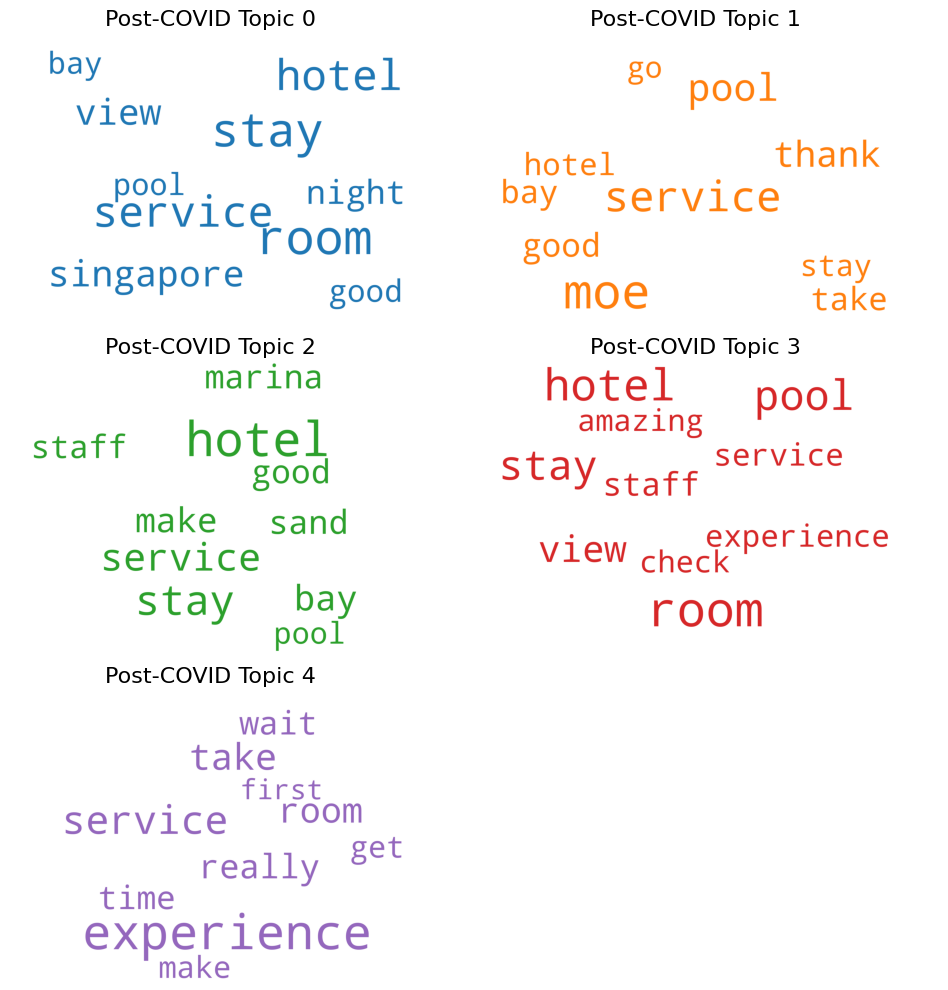

In [45]:
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

# Create WordClouds for each topic in the pre-COVID dataset
clouds_pre = []

for i in range(num_topics):
    cloud = WordCloud(background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)
    topic_words = dict(pre_lda_model.show_topic(i, topn=10))
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    clouds_pre.append(cloud)

# Create WordClouds for each topic in the post-COVID dataset
clouds_post = []

for i in range(num_topics):
    cloud = WordCloud(background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)
    topic_words = dict(post_lda_model.show_topic(i, topn=10))
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    clouds_post.append(cloud)

# Plot the WordClouds for pre-COVID topics
fig_pre, axes_pre = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes_pre.flatten()):
    fig_pre.add_subplot(ax)
    if i < len(clouds_pre):
        plt.gca().imshow(clouds_pre[i])
        plt.gca().set_title('Pre-COVID Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')

# Plot the WordClouds for post-COVID topics
fig_post, axes_post = plt.subplots(3, 2, figsize=(10, 10), sharex=True, sharey=True)

for i, ax in enumerate(axes_post.flatten()):
    fig_post.add_subplot(ax)
    if i < len(clouds_post):
        plt.gca().imshow(clouds_post[i])
        plt.gca().set_title('Post-COVID Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
